In [1]:
import numpy as np
import pandas as pd 

# Load the recently saved combined CSV to count the number of fraudulent entries
data = pd.read_csv('Combined_Fraudulent_Transactions.csv')

In [2]:
data.head()


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [3]:
data.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06
mean,2.268093e+02,3.000235e+00,3.451284e+01,5.015415e-02,1.796308e+02,1.128663e+01
std,2.705831e+02,1.414814e+00,1.000323e+01,2.182630e-01,1.068726e+02,6.976067e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.862000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [4]:
# Convert 'Transaction Date' column to datetime format if not already done
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')

# Find the earliest transaction
earliest_transaction = data['Transaction Date'].min()

# Find the latest transaction
latest_transaction = data['Transaction Date'].max()

print(f"Earliest Transaction Date: {earliest_transaction}")
print(f"Latest Transaction Date: {latest_transaction}")


Earliest Transaction Date: 2024-01-01 00:00:00
Latest Transaction Date: 2024-04-07 08:54:03


In [5]:
# Check for duplicated customer IDs
duplicates = data['Customer ID'].duplicated().any()

# Print the result
print("Are there duplicated customer IDs?", duplicates)

Are there duplicated customer IDs? False


In [6]:
# Check for duplicated customer IDs
duplicates = data['Shipping Address'].duplicated().any()

# Print the result
print("Are there duplicated Shipping Address?", duplicates)

Are there duplicated Shipping Address? True


In [7]:
data.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06,1.496586e+06
mean,2.268093e+02,3.000235e+00,3.451284e+01,5.015415e-02,1.796308e+02,1.128663e+01
std,2.705831e+02,1.414814e+00,1.000323e+01,2.182630e-01,1.068726e+02,6.976067e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.862000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


## Handle Addresses 因为这个address都是什么城市跟地址连在一起，把他的城市跟state给他extract出来

To effectively handle the address data in your dataset and enhance its utility for machine learning purposes, consider the following comprehensive strategy based on observations and the nature of address data:

### Observations on Address Data
1. **High Cardinality**: Address fields such as Shipping and Billing addresses contain a large number of unique values. This high cardinality can be problematic for machine learning models, leading to issues such as overfitting and high computational costs during training.
   
2. **Limited Predictive Value of Specific Details**: The very specific details of an address (e.g., street number or apartment unit) are unlikely to have significant predictive power on their own for broader applications like fraud detection, customer segmentation, or demand forecasting.

3. **Geographical Patterns**: Broader geographic information, like city and state, often correlates more strongly with the target variables (e.g., purchasing power, regional preferences, fraud rates) than finer details of the street addresses.

4. **Consistency and Formatting**: Addresses often suffer from inconsistencies in formatting, which can lead to challenges in processing and using them directly. Common issues include abbreviations, spelling errors, and varying order of address components.

### Strategy for Address Handling
#### How to Deal with Addresses:
- **Extraction of City and State**: Extract city and state information from the full address. This approach reduces the complexity of the data by transforming a highly granular variable into more manageable and meaningful features.
- **Creation of Structured Features**: Transform these extracted values into structured categorical features that can be readily encoded for model training. This transformation is crucial for standardizing input data and ensuring that the model can interpret it correctly.

#### Why This Approach Is Beneficial:
- **Reduces Overfitting**: By focusing on city and state rather than full addresses, you minimize the risk of the model learning noise and specific patterns that do not generalize beyond the training data. This simplification helps in building a more robust model.
- **Enhances Model Performance**: Geographic regions like cities and states are more likely to exhibit consistent patterns related to the problem you are solving (e.g., consumer behavior, fraud risk). Models trained with these features are better at capturing relevant regional trends.
- **Improves Scalability and Efficiency**: Reducing the feature space by using city and state instead of full addresses decreases the computational burden. This efficiency is crucial when scaling up the model to handle larger datasets.
- **Increases Interpretability**: Features like city and state are easily interpretable, making it simpler to explain model predictions to stakeholders. This clarity is essential for operationalizing model outputs in business decisions.

### Implementation Tips:
- **Parsing Logic**: Develop a robust parsing logic or use libraries like `usaddress` or `pyap` to extract city and state from the addresses. Handling variations and inconsistencies in address formats will be crucial here.
- **Handling Missing Data**: If city or state information is missing after extraction, consider strategies like using a placeholder category (e.g., 'Unknown') or imputing based on other available data.
- **Data Validation**: Ensure the accuracy of the extracted data by validating the city and state names against a standard geographic database or API.

By implementing this strategy, you ensure that the address data in your dataset is utilized effectively, enhancing the overall quality and utility of your machine learning models.

In [8]:
import pandas as pd
import re

def extract_location(address):
    # First, try to handle standard address formats
    match = re.search(r'([^,\n]+)\s*,\s*([A-Z]{2})\s*\d+', address)
    if match:
        return pd.Series([match.group(1).strip(), match.group(2).strip()])
    
    # Handle military addresses, which typically lack a city and use an APO/FPO/DPO with a state-like designation
    match = re.search(r'(APO|FPO|DPO)\s*(AA|AE|AP)', address, re.IGNORECASE)
    if match:
        # Military 'city' can be considered as APO/FPO/DPO and 'state' as AA/AE/AP
        return pd.Series([match.group(1), match.group(2)])
    
    # Add other patterns here if needed
    return pd.Series([None, None])

# Apply the function to your DataFrame columns
data[['Shipping City', 'Shipping State']] = data['Shipping Address'].apply(extract_location)
data[['Billing City', 'Billing State']] = data['Billing Address'].apply(extract_location)

# Display the DataFrame to verify the new columns
print(data[['Shipping Address', 'Shipping City', 'Shipping State', 'Billing Address', 'Billing City', 'Billing State']])


                                          Shipping Address     Shipping City  \
0                         Unit 8934 Box 0058\nDPO AA 05437               DPO   
1                  634 May Keys\nPort Cherylview, NV 75063   Port Cherylview   
2          16282 Dana Falls Suite 790\nRothhaven, IL 15564         Rothhaven   
3           828 Strong Loaf Apt. 646\nNew Joshua, UT 84798        New Joshua   
4        29799 Jason Hills Apt. 439\nWest Richardtown, ...  West Richardtown   
...                                                    ...               ...   
1496581                         USNV Clayton\nFPO AE 82639               FPO   
1496582  9288 Patricia Cape Apt. 527\nMelissaton, IL 38543        Melissaton   
1496583  3015 Elizabeth Summit Suite 819\nEast Joelfort...     East Joelfort   
1496584             531 Brittany Pike\nNew Stacy, OR 87952         New Stacy   
1496585           289 Adams Wells\nWest Joeltown, LA 69190     West Joeltown   

        Shipping State                 

In [9]:
# Save the updated DataFrame to a new CSV file
data.to_csv('updated_data_with_locations.csv', index=False)

***************


### read data after deal with locations

In [10]:
import pandas as pd

# Specify the path to your updated CSV file
file_path = 'updated_data_with_locations.csv'

# Read the CSV file into a new DataFrame
new_data = pd.read_csv(file_path)

# Display the first few rows of the new DataFrame to confirm it's loaded correctly
new_data


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Shipping City,Shipping State,Billing City,Billing State
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5,DPO,AA,DPO,AA
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8,Port Cherylview,NV,Port Cherylview,NV
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3,Rothhaven,IL,Rothhaven,IL
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20,New Joshua,UT,New Joshua,UT
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5,West Richardtown,OH,West Richardtown,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16,FPO,AE,FPO,AE
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17,Melissaton,IL,Melissaton,IL
1496583,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23,East Joelfort,IN,East Joelfort,IN
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11,New Stacy,OR,New Stacy,OR


### 想看看之前处理locations之后是不是所有locations都被处理了

In [11]:
# Check for NaN values in specific columns
columns_to_check = ['Shipping City', 'Shipping State', 'Billing City', 'Billing State']
nan_counts = new_data[columns_to_check].isnull().sum()

# Print the number of NaN values in each column
print("NaN Counts in Address Columns:")
print(nan_counts)


NaN Counts in Address Columns:
Shipping City     0
Shipping State    0
Billing City      0
Billing State     0
dtype: int64


### Check the problems of the dataste 看看都有什么问题

Missing Values:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
Shipping City         0
Shipping State        0
Billing City          0
Billing State         0
dtype: int64


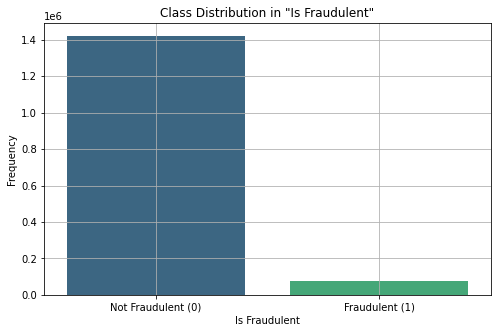


Class Distribution in 'Is Fraudulent':
0    1421526
1      75060
Name: Is Fraudulent, dtype: int64
0    0.949846
1    0.050154
Name: Is Fraudulent, dtype: float64

Number of Features: 20


/var/folders/5v/b2hljkwx175g73wyjh6x8hzr0000gn/T/ipykernel_95687/1196183766.py:31: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).sum()



Outliers (based on IQR):
Account Age Days          0
Billing Address           0
Billing City              0
Billing State             0
Customer Age          13973
Customer ID               0
Customer Location         0
Device Used               0
IP Address                0
Is Fraudulent         75060
Payment Method            0
Product Category          0
Quantity                  0
Shipping Address          0
Shipping City             0
Shipping State            0
Transaction Amount    80519
Transaction Date          0
Transaction Hour          0
Transaction ID            0
dtype: int64

Unique Values Check:
Column Transaction ID has these unique values: ['15d2e414-8735-46fc-9e02-80b472b2580f'
 '0bfee1a0-6d5e-40da-a446-d04e73b1b177'
 'e588eef4-b754-468e-9d90-d0e0abfc1af0'
 '4de46e52-60c3-49d9-be39-636681009789'
 '074a76de-fe2d-443e-a00c-f044cdb68e21'
 '4e707452-7c8a-4cbd-b0c1-2aeaa35c5e88'
 '7ed952fe-8ae1-4f11-8cc5-6607060240d8'
 '0b2fb5aa-7171-472f-8269-371094608a07'
 '1f52366c-7

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for Missing Values
print("Missing Values:")
print(new_data.isnull().sum())

# Visualize Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Is Fraudulent', data=new_data, palette='viridis')
plt.title('Class Distribution in "Is Fraudulent"')
plt.xlabel('Is Fraudulent')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Fraudulent (0)', 'Fraudulent (1)'])
plt.grid(True)
plt.show()

# Check for Class Imbalance in the 'Is Fraudulent' column
print("\nClass Distribution in 'Is Fraudulent':")
print(new_data['Is Fraudulent'].value_counts())
print(new_data['Is Fraudulent'].value_counts(normalize=True))  # Shows the proportion of each class

# Check for High Dimensionality
print("\nNumber of Features:", new_data.shape[1])

# Detecting Outliers Using IQR
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers (based on IQR):")
print(outliers)

# Check for Noise or Inconsistent Data Entries
print("\nUnique Values Check:")
for col in new_data.columns:
    if new_data[col].dtype == 'object':  # Assuming categorical data is of type object
        print(f"Column {col} has these unique values: {new_data[col].unique()[:10]}")  # Show only the first 10 unique values to avoid overwhelming output

# Text Data Analysis (if applicable)
if 'text_column' in new_data.columns:  # Replace 'text_column' with the name of your text column
    print("\nText Data Analysis:")
    new_data['text_length'] = new_data['text_column'].apply(lambda x: len(str(x).split()))
    print(new_data['text_length'].describe())


Let's interpret the results sequentially based on the code checks performed, and consider possible next steps for each observation:

### 1. **Missing Values**
- **Result:** No missing values in any of the columns, including key fields like Transaction ID, Customer ID, and the target variable 'Is Fraudulent'.
- **Further Steps:** No immediate action required regarding missing data. This is ideal as it allows you to proceed without needing to handle imputations or removals, thus maintaining the integrity and size of your dataset.

### 2. **Class Distribution in 'Is Fraudulent'**
- **Result:** Significant class imbalance is noted with non-fraudulent transactions (0) at 1,421,526 and fraudulent transactions (1) at 75,060, making up about 95% and 5% of the data, respectively.
- **Further Steps:** Consider applying techniques such as SMOTE for oversampling the minority class or adjusting the model's threshold to improve the detection of fraudulent transactions. Evaluate model performance using metrics suited for imbalanced data, such as the F1 score, ROC AUC, or precision-recall curve.

### 3. **Visualization of Class Distribution**
- **Insight:** The visual confirmed the numeric data, clearly showing a disparity between the two classes.
- **Further Steps:** Visualizations should be used in reports to stakeholders to highlight the need for specialized models or techniques to handle the imbalance.

### 4. **High Dimensionality**
- **Result:** The dataset has 20 features.
- **Further Steps:** Although not excessively high, consider performing feature importance analysis to identify and possibly remove redundant or irrelevant features, thus simplifying the model without sacrificing performance.

### 5. **Detecting Outliers Using IQR**
- **Result:** Outliers are present in significant numbers in 'Customer Age' and 'Transaction Amount'. The 'Is Fraudulent' class also shows as having a large number of outliers, which reflects its minority status in the dataset.
- **Further Steps:** Assess whether outliers in 'Customer Age' and 'Transaction Amount' are errors or natural variations. If natural, consider robust scaling or transformations. For 'Is Fraudulent', understand that its outlier status is due to class imbalance rather than an issue to be corrected.

### 6. **Unique Values Check**
- **Observation:** The dataset features unique identifiers and a reasonable variety of categorical variables. Addresses and IP addresses show expected variability.
- **Further Steps:** Ensure that categorical variables are appropriately encoded before modeling. For high-cardinality variables like IP addresses, consider whether to include them based on their predictive value or potential to cause overfitting.

### Summary and Recommendations:
The dataset is well-prepared with no missing values and reasonable feature diversity. However, the significant class imbalance and presence of outliers in key numerical fields are the primary concerns.

- **Imbalance Handling:** Employ advanced techniques to balance the classes to avoid biased predictions towards the majority class.
- **Outlier Management:** Further investigate the nature of the outliers in 'Customer Age' and 'Transaction Amount' to decide on the best handling strategy. For the target variable, adapt model evaluation strategies to focus on the minority class's predictive accuracy.
- **Feature Engineering:** Continue to monitor the effectiveness of existing features and consider engineering new features or adjusting existing ones based on their performance and relevance in predictive models.


In [13]:
new_data.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour', 'Shipping City',
       'Shipping State', 'Billing City', 'Billing State'],
      dtype='object')

***


## No Missing values 不用管

## Deal with Categorical Variable 给他encode


In [14]:
import pandas as pd
from category_encoders import CountEncoder

# One-Hot Encoding for categorical variables with limited unique values
one_hot_columns = ['Payment Method', 'Product Category', 'Device Used']
new_data_encoded = pd.get_dummies(new_data, columns=one_hot_columns)

# Initialize and apply Count Encoder for high-cardinality categorical variables
count_columns = ['Customer Location', 'Shipping City', 'Billing City', 'Shipping State', 'Billing State']
count_encoder = CountEncoder()
new_data_encoded[count_columns] = count_encoder.fit_transform(new_data[count_columns])

# Display the encoded DataFrame to verify changes
new_data_encoded


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,1,17,152,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,...,0,0,0,1,0,0,0,0,0,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,2,40,316,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",...,0,1,0,1,0,0,0,1,0,0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,2,22,367,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",...,0,0,0,0,0,1,0,0,0,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,5,31,29,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",...,0,0,1,0,0,0,0,1,0,0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,2,51,296,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,5,32,125,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,...,0,0,0,0,0,0,1,0,0,1
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,4,41,36,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",...,1,0,1,0,0,0,0,1,0,0
1496583,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,1,9,14,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,...,0,0,0,0,1,0,0,0,0,1
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,2,39,280,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",...,0,1,0,0,0,1,0,0,1,0


## Drop 'Shipping State' and 'Billing State' columns

In [15]:
# Drop 'Shipping State' and 'Billing State' columns
new_data = new_data_encoded.drop(columns=['Shipping State', 'Billing State'])

# Display the updated DataFrame
new_data


,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,1,17,152,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,...,0,0,0,1,0,0,0,0,0,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,2,40,316,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",...,0,1,0,1,0,0,0,1,0,0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,2,22,367,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",...,0,0,0,0,0,1,0,0,0,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,5,31,29,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",...,0,0,1,0,0,0,0,1,0,0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,2,51,296,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,5,32,125,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,...,0,0,0,0,0,0,1,0,0,1
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,4,41,36,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",...,1,0,1,0,0,0,0,1,0,0
1496583,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,1,9,14,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,...,0,0,0,0,1,0,0,0,0,1
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,2,39,280,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",...,0,1,0,0,0,1,0,0,1,0


## Deal with outliers and numberical variables

### 先去掉outliers

In [16]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

# Define columns to check for outliers
columns_to_check = ['Customer Age', 'Transaction Amount']

# Apply outlier filtering using 3 * IQR
filtered_data = new_data[~((new_data[columns_to_check] < (Q1 - 3 * IQR)) | (new_data[columns_to_check] > (Q3 + 3 * IQR))).any(axis=1)]

# Check how much data remains after filtering
print("Original Data Count:", new_data.shape[0])
print("Data Count After Removing Outliers:", filtered_data.shape[0])


/var/folders/5v/b2hljkwx175g73wyjh6x8hzr0000gn/T/ipykernel_95687/3982273824.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_data = new_data[~((new_data[columns_to_check] < (Q1 - 3 * IQR)) | (new_data[columns_to_check] > (Q3 + 3 * IQR))).any(axis=1)]
/var/folders/5v/b2hljkwx175g73wyjh6x8hzr0000gn/T/ipykernel_95687/3982273824.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_data = new_data[~((new_data[columns_to_check] < (Q1 - 3 * IQR)) | (new_data[columns_to_check] > (Q3 + 3 * IQR))).any(axis=1)]


Original Data Count: 1496586
Data Count After Removing Outliers: 1473050


In [17]:
# update new_data
new_data = filtered_data
new_data

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,1,17,152,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,...,0,0,0,1,0,0,0,0,0,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,2,40,316,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",...,0,1,0,1,0,0,0,1,0,0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,2,22,367,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",...,0,0,0,0,0,1,0,0,0,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,5,31,29,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",...,0,0,1,0,0,0,0,1,0,0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,2,51,296,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496580,1bbd6772-57b0-4fa2-81f2-e1c7096eecc1,04f68fcd-4642-4ef0-9549-e31505226550,24.74,2024-02-08 00:55:49,3,25,8,161.23.44.204,"547 Lisa Wells\nEast Victoriafurt, MP 49935","22844 Gordon Burgs Suite 875\nZacharyland, NE ...",...,1,0,0,0,1,0,0,1,0,0
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,5,32,125,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,...,0,0,0,0,0,0,1,0,0,1
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,4,41,36,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",...,1,0,1,0,0,0,0,1,0,0
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,2,39,280,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",...,0,1,0,0,0,1,0,0,1,0


### 再standardscaler 所有的numerical values

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define numerical columns to scale
numerical_columns = ['Transaction Amount', 'Customer Age', 'Account Age Days' ,'Quantity']

# Scale these columns
new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])

# Display scaled data
print(new_data[numerical_columns].head())

   Transaction Amount  Customer Age  Account Age Days  Quantity
0           -0.801876     -1.750960         -1.407884 -1.413806
1            1.008290      0.548484         -1.014053 -0.706956
2           -0.386793     -1.251081         -1.098445 -0.706956
3            0.114907     -0.351298         -0.526452  1.413595
4           -0.455846      1.648218         -0.207636 -0.706956


/var/folders/5v/b2hljkwx175g73wyjh6x8hzr0000gn/T/ipykernel_95687/3421940335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[numerical_columns] = scaler.fit_transform(new_data[numerical_columns])


In [19]:
print(new_data["Account Age Days"])


0         -1.407884
1         -1.014053
2         -1.098445
3         -0.526452
4         -0.207636
             ...   
1496580   -0.601468
1496581    1.714636
1496582    1.086381
1496584    1.564605
1496585    0.214326
Name: Account Age Days, Length: 1473050, dtype: float64


In [20]:
new_data

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Quantity,Customer Age,Customer Location,IP Address,Shipping Address,Billing Address,...,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,-0.801876,2024-02-20 05:58:41,-1.413806,-1.750960,152,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,...,0,0,0,1,0,0,0,0,0,1
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,1.008290,2024-02-25 08:09:45,-0.706956,0.548484,316,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",...,0,1,0,1,0,0,0,1,0,0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,-0.386793,2024-03-18 03:42:55,-0.706956,-1.251081,367,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",...,0,0,0,0,0,1,0,0,0,1
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,0.114907,2024-03-16 20:41:31,1.413595,-0.351298,29,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",...,0,0,1,0,0,0,0,1,0,0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,-0.455846,2024-01-15 05:08:17,-0.706956,1.648218,296,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496580,1bbd6772-57b0-4fa2-81f2-e1c7096eecc1,04f68fcd-4642-4ef0-9549-e31505226550,-0.983782,2024-02-08 00:55:49,-0.000106,-0.951153,8,161.23.44.204,"547 Lisa Wells\nEast Victoriafurt, MP 49935","22844 Gordon Burgs Suite 875\nZacharyland, NE ...",...,1,0,0,0,1,0,0,1,0,0
1496581,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,-0.825658,2024-01-26 16:25:05,1.413595,-0.251323,125,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,...,0,0,0,0,0,0,1,0,0,1
1496582,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,-0.860075,2024-02-25 17:03:26,0.706745,0.648460,36,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",...,1,0,1,0,0,0,0,1,0,0
1496584,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,-0.931910,2024-02-09 11:29:18,-0.706956,0.448508,280,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",...,0,1,0,0,0,1,0,0,1,0


## Deal with Imbalance data 

## SMOTE算法必须要保证是numerical columns
## 所以把这些没用的column 还不是numerical的给踢出去

In [21]:
# List of columns to remove
columns_to_remove = ['Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address']

# Drop the columns from the DataFrame
new_data = new_data.drop(columns=columns_to_remove)


## 又因为有transaction date这个column
## 他没发变成numerical
## 只能分成年月日

In [22]:
# Convert the 'Transaction Date' column to datetime format
new_data['Transaction Date'] = pd.to_datetime(new_data['Transaction Date'], errors='coerce')

# Extract date components as new features
new_data['Transaction Year'] = new_data['Transaction Date'].dt.year
new_data['Transaction Month'] = new_data['Transaction Date'].dt.month
new_data['Transaction Day'] = new_data['Transaction Date'].dt.day
new_data['Transaction Weekday'] = new_data['Transaction Date'].dt.weekday
new_data['Transaction Hour'] = new_data['Transaction Date'].dt.hour

# Drop the original 'Transaction Date' column after transformation
new_data = new_data.drop(columns=['Transaction Date'])

In [23]:
# Display the head of the DataFrame to verify the changes
new_data

,Transaction Amount,Quantity,Customer Age,Customer Location,Is Fraudulent,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,...,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday
0,-0.801876,-1.413806,-1.750960,152,0,-1.407884,5,53538,53474,0,...,0,0,0,0,0,1,2024,2,20,1
1,1.008290,-0.706956,0.548484,316,0,-1.014053,8,3,3,0,...,0,0,0,1,0,0,2024,2,25,6
2,-0.386793,-0.706956,-1.251081,367,0,-1.098445,3,9,9,1,...,0,1,0,0,0,1,2024,3,18,0
3,0.114907,1.413595,-0.351298,29,0,-0.526452,20,357,349,0,...,0,0,0,1,0,0,2024,3,16,5
4,-0.455846,-0.706956,1.648218,296,0,-0.207636,5,20,20,0,...,0,0,0,0,0,1,2024,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496580,-0.983782,-0.000106,-0.951153,8,0,-0.601468,0,7,62,0,...,1,0,0,1,0,0,2024,2,8,3
1496581,-0.825658,1.413595,-0.251323,125,0,1.714636,16,53534,53470,1,...,0,0,1,0,0,1,2024,1,26,4
1496582,-0.860075,0.706745,0.648460,36,0,1.086381,17,130,138,0,...,0,0,0,1,0,0,2024,2,25,6
1496584,-0.931910,-0.706956,0.448508,280,0,1.564605,11,88,87,0,...,0,1,0,0,1,0,2024,2,9,4


In [36]:
# Save the current dataset to CSV before applying SMOTE
new_data.to_csv('data_before_smote.csv', index=False)


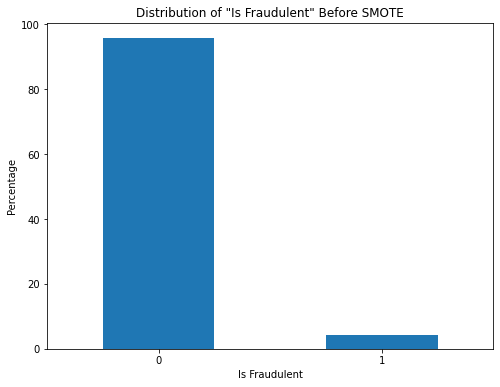

In [37]:
# Load the newly uploaded CSV file
file_path = 'data_before_smote.csv'
new_data = pd.read_csv(file_path)

# Calculate the distribution of "Is Fraudulent"
fraud_distribution = new_data['Is Fraudulent'].value_counts(normalize=True) * 100

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
fraud_distribution.plot(kind='bar')
plt.title('Distribution of "Is Fraudulent" Before SMOTE')
plt.xlabel('Is Fraudulent')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


In [38]:
new_data

,Transaction Amount,Quantity,Customer Age,Customer Location,Is Fraudulent,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday
0,-0.801876,-1.413806,-1.750960,152,0,-1.407884,5,53538,53474,0,1,0,0,0,1,0,0,0,0,0,1,2024,2,20,1
1,1.008290,-0.706956,0.548484,316,0,-1.014053,8,3,3,0,0,0,1,0,1,0,0,0,1,0,0,2024,2,25,6
2,-0.386793,-0.706956,-1.251081,367,0,-1.098445,3,9,9,1,0,0,0,0,0,0,1,0,0,0,1,2024,3,18,0
3,0.114907,1.413595,-0.351298,29,0,-0.526452,20,357,349,0,1,0,0,1,0,0,0,0,1,0,0,2024,3,16,5
4,-0.455846,-0.706956,1.648218,296,0,-0.207636,5,20,20,0,1,0,0,1,0,0,0,0,0,0,1,2024,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473045,-0.983782,-0.000106,-0.951153,8,0,-0.601468,0,7,62,0,0,1,0,0,0,1,0,0,1,0,0,2024,2,8,3
1473046,-0.825658,1.413595,-0.251323,125,0,1.714636,16,53534,53470,1,0,0,0,0,0,0,0,1,0,0,1,2024,1,26,4
1473047,-0.860075,0.706745,0.648460,36,0,1.086381,17,130,138,0,0,1,0,1,0,0,0,0,1,0,0,2024,2,25,6
1473048,-0.931910,-0.706956,0.448508,280,0,1.564605,11,88,87,0,0,0,1,0,0,0,1,0,0,1,0,2024,2,9,4


***
